In [5]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

In [369]:
testing = ([0,20],[10,20],[20,10],[20,0],[20,-10],[10,-20],[0,-20],[-10,-20],[-20,-10],[-20,0],[-20,10],[-10,20])

In [370]:
def direction(a):
  """
  
    Calculates the direction of the movement as well as the traveled distance
  
    Parameters:
    a (int): Direction of movement
  
    Returns:
    DataFrame: Coordinate increments in the direction of the moment (X,Y) and distance (D)
  
    """
  if a == 1: #North
    cord = pd.DataFrame([[0,10,10]], columns = list('XYD'))
  elif a == 2: #South
    cord = pd.DataFrame([[0,-10,10]], columns = list('XYD'))
  elif a == 3: #East
    cord = pd.DataFrame([[0,10,10]], columns = list('XYD'))
  elif a == 4: #West
    cord = pd.DataFrame([[10,0,10]], columns = list('XYD'))
  else:
    raise ValueError("Enter Number between 1-4")
  return cord

In [371]:
initial_cordinate = pd.DataFrame([[0,0,0]], columns = list('XYD')) #initially at (0,0,0)

In [409]:
def time():
  """
    From the starting point (0,0) calculates random paths until a testing point is reached
  
    Returns:
    DataFrame: All trias conducted repoted as final cordinates (X,Y) and distance (D)
  
    """
  ap = pd.DataFrame()
  #ap = pd.DataFrame(columns=['cordinates','distance'])
  cordinate = initial_cordinate
  for i in range (1,500):
    number = random.randint(1,4)
    cordinate = cordinate + direction(number)
    k=cordinate.iloc[:,:2]
    k = list(k.iloc[0])
    k_1=cordinate.iloc[:,:3]
    #k_1 = list(k_1.iloc[0])
    if k in testing:
      cordinate = initial_cordinate
      #print("reached ",k," traveling ",k_1[2], "cm")
      #ap = ap.append({'cordinates':k,'distance':k_1[2]},ignore_index=True)
      ap = ap.append(k_1)
  return(ap)

In [410]:
t=pd.DataFrame()
for a in range(1,200):
  x = time()
  y=x.iloc[:,2]
  y=pd.Series(y.mean())
  t=t.append(y/10,ignore_index=True)

In [431]:
print("For 198 iterations of 'time()' with around 140 succesful trials each time, the mean time until a barrier is reached is", round(t.mean().values[0],3), "seconds")

For 198 iterations of 'time()' with around 140 succesful trials each time, the mean time until a barrier is reached is 3.556 seconds


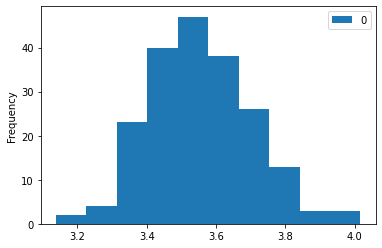

In [432]:
t.plot.hist() # Distribution of the Time variable

In [433]:
t.std() #Standard Deviation

0    0.151585
dtype: float64

In [440]:
CI_u,CI_l=(t.mean()+1.96*((t.std())/np.sqrt(len(t)))),(t.mean()-1.96*((t.std())/np.sqrt(len(t))))
print("with a 95% of condicente the result is between", CI_u[0],"seconds and",CI_l[0],"seconds")

with a 95% of condicente the result is between 3.577162682254582 seconds and 3.535040075279679 seconds


In [443]:
t.min()[0]

3.138364779874214

In [444]:
t.max()[0]

4.016129032258065